In [5]:
import random
from MCA import SIMPLISMA
import numpy as np
import matplotlib.pyplot as plt



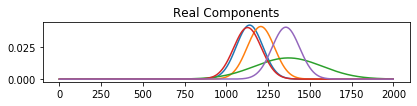

In [12]:
# Number of Spectral Components
nPure = 5
# Allowed Noise Percentage
noise = 5

x0 = np.zeros(nPure)
sigma = np.zeros(nPure)
for i in range(nPure):
    x0[i] = random.uniform(-100, 100)
    sigma[i] = random.uniform(3, 25)

x = np.linspace(start=-120, stop=120, num=2000)

gx = np.zeros((len(x), 5))
plt.subplot(3, 1, 1)
plt.subplots_adjust(left=0.1, bottom=0.075, right=0.95, top=0.9, wspace=0.2, hspace=0.5)

for i in range(5):
    gx[:, i] = np.exp(-(x - x0[i]) ** 2 / (2 * sigma[i] ** 2)) / np.sqrt(2 * np.pi * sigma[i] ** 2)
    plt.plot(gx[:, i])
    plt.title('Real Components')

# create array with random normalised linear combination of gaussian functions
nspec = 200
array = np.zeros((len(x), nspec))
idx = list(range(nPure))

for i in range(nspec):
    randj = np.zeros(nPure)
    random.shuffle(idx)
    for j in range(nPure):
        randj[j] = random.uniform(0, 1 - np.sum(randj))
        array[:, i] = gx[:, idx[j]] * randj[j]
        
plt.show()

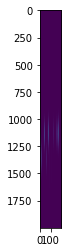

In [14]:
plt.imshow(array)
plt.show()

In [15]:
sp, concs = SIMPLISMA.simplisma(array, nPure, noise)


purest variable 1:  24 2.317084178479286
purest variable 2:  111 1.7211287080393673
purest variable 3:  33 0.5005383490188557
purest variable 4:  55 0.044624697973955574
purest variable 5:  46 0.0003527665049606121


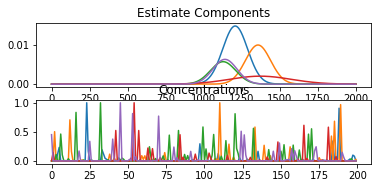

In [16]:
plt.subplot(3, 1, 2)
plt.plot(sp)
plt.title('Estimate Components')
plt.subplot(3, 1, 3)
for i in range(nPure):
    plt.plot(concs[i])
    
plt.title('Concentrations')
plt.show()